# Лабораторная работа №4. Кластеризация

## Цель работы

Изучение алгоритмов и методов кластеризации на практике.

Вариант 11.

## Ход выполнения

### Часть 1 - Кластеризация набора данных

Импортируются нужные библиотеки, используется функция для создания набора данных с параметрами:`n` - число объектов в каждой группе, `seed` - зерно, необходимое для воспроизводимости случайных значений.

В результате применения получается DataFrame, содержащий заданное число объектов в каждой группе (всего 3 группы) с двумя признаками: x и y.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

def make_data(n, seed):
  np.random.seed(seed)
  shift_matrix = np.array([[3, 3], [6, 9], [9, 3]])
  data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
  data = np.swapaxes(data, 1, 2)
  data = data.reshape((-1, 2))
  data *= np.array([[20, 0.5]])
  df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},columns=['x', 'y'])
  df = df.sample(frac=1.0)
  return df

Далее генерируются тренировочные и тестовый набор данных. Создаются два набора данных: `train` и `test`. Параметр n = 75, seed = 34 для `train` , для `test` n = 75 seed = 78.

In [ ]:
train = make_data(n=75, seed=34)
test = make_data(n=75, seed=78)

Данные стандартизируются, чтобы они имели среднее значение 0 и стандартное отклонение 1, для того чтобы улучшить производительность алгоритмов кластеризации.

fit_transform сразу находит параметры стандартизации и применяет их к train

In [ ]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

С помощью методов `fit` и `predict` модель обучается для кластеризации методом K-means (К-средних) для трёх кластеров. Создаются метки кластеров.

In [ ]:
k_means = KMeans(n_clusters = 3, random_state = 1)
k_means = k_means.fit(train_scaled)
clusters = k_means.predict(train_scaled)

Проводится визуализация кластеров с помощью `scatter`. На графике помечаются центры кластеров. Объекты из разных кластеров помечаются разными цветами.

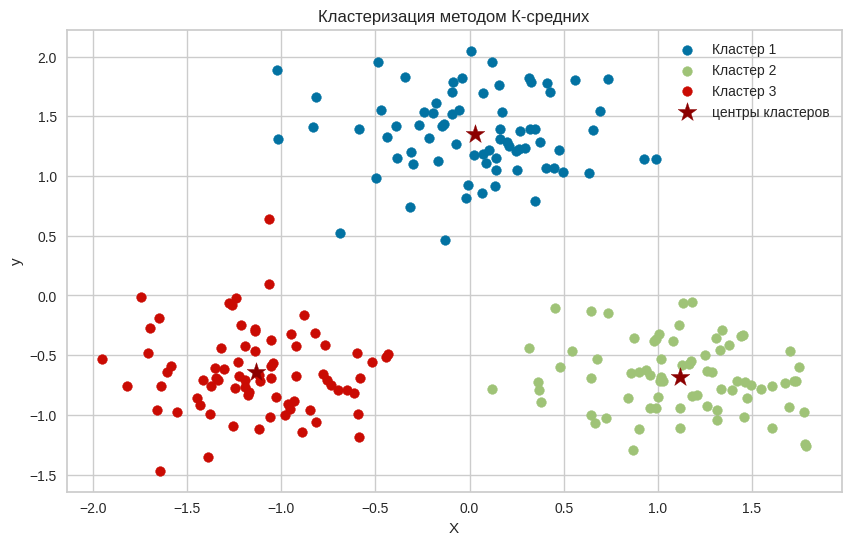

In [ ]:
plt.figure(figsize=(10,6))
for i in range(3):
  cluster_points = train_scaled[clusters == i]
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {i + 1}')

cluster_centers = k_means.cluster_centers_
for i in range(3):
  plt.scatter(cluster_centers[i][0], cluster_centers[i][1], color="darkred", marker="*", s=200,
              label='центры кластеров' if i == 0 else "")

plt.xlabel('X')
plt.ylabel('y')
plt.title('Кластеризация методом К-средних')
plt.legend()
plt.grid(True)
plt.show()

Этот график представляет результаты кластеризации методом K-средних, где данные распределены в трех кластерах. Центры кластеров: Обозначены красными звездами, они указывают на центры масс (средние значения) каждого кластера, вычисленные алгоритмом. Данные каждого кластера хорошо отделены друг от друга, что говорит о качественной кластеризации.
Кластеры выглядят четко разделенными, что указывает на хорошо настроенный алгоритм. Этот метод подходит для анализа данных с явно выраженными группами.

Далее, с использованием тестовых данных выполняется предсказание. Строятся графики для тестовых данных.

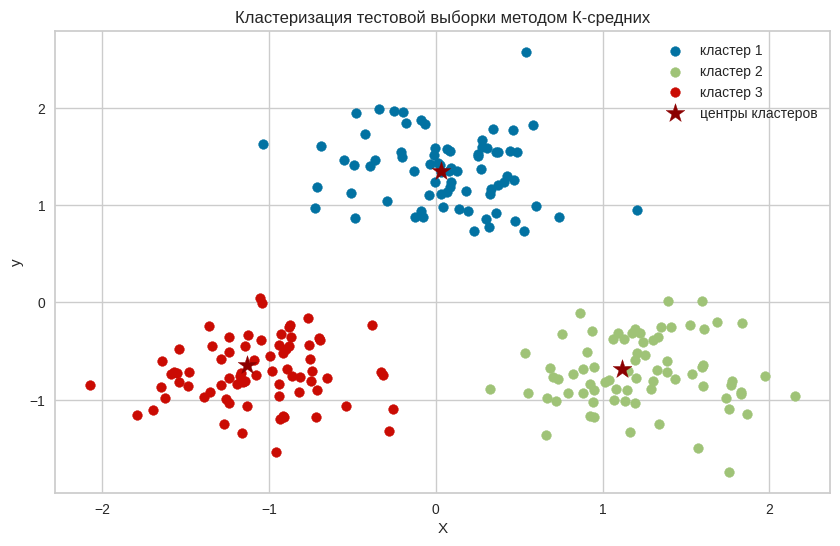

In [ ]:
clusters_predict = k_means.predict(test_scaled)

plt.figure(figsize=(10,6))
for i in range(3):
  cluster_points = test_scaled[clusters_predict == i]
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'кластер {i + 1}')

cluster_centers = k_means.cluster_centers_
for i in range(3):
  plt.scatter(cluster_centers[i][0], cluster_centers[i][1], color="darkred", marker="*", s=200,
              label='центры кластеров' if i == 0 else "")

plt.xlabel('X')
plt.ylabel('y')
plt.title('Кластеризация тестовой выборки методом К-средних')
plt.legend()
plt.show()

Модель неплохо показывает себя на тестовой выборке. По графику видно, что определение классов для наблюдений прошло успешно.

Далее стоит подсчитать коэффициент силуэта. Коэффициент силуэта (Silhouette Score) - это метрика, используемая для оценки качества кластеризации данных. Он предоставляет меру того, насколько объект хорошо соответствует своему собственному кластеру по сравнению с другими кластерами. Значение коэффициента силуэта находится в диапазоне от -1 до 1.

Вычисление коэффициента силуэта обычно выполняется для каждого объекта по отношению к другим объектам в том же кластере и объектам в ближайшем соседнем кластере.

In [ ]:
s_score = silhouette_score(test_scaled, clusters_predict)
print(s_score)

0.7063385421252919


Коэффициент силуэта равный 0.706 указывает на хорошее качество кластеризации и говорит о том, что объекты в пределах кластеров хорошо сгруппированы, кластеры четко разделены друг от друга, было выбрано правильное число кластеров для набора данных.

Далее те же действия проводятся для количества кластеров равного 2 и 4. Сравниваются результаты и делаются выводы.


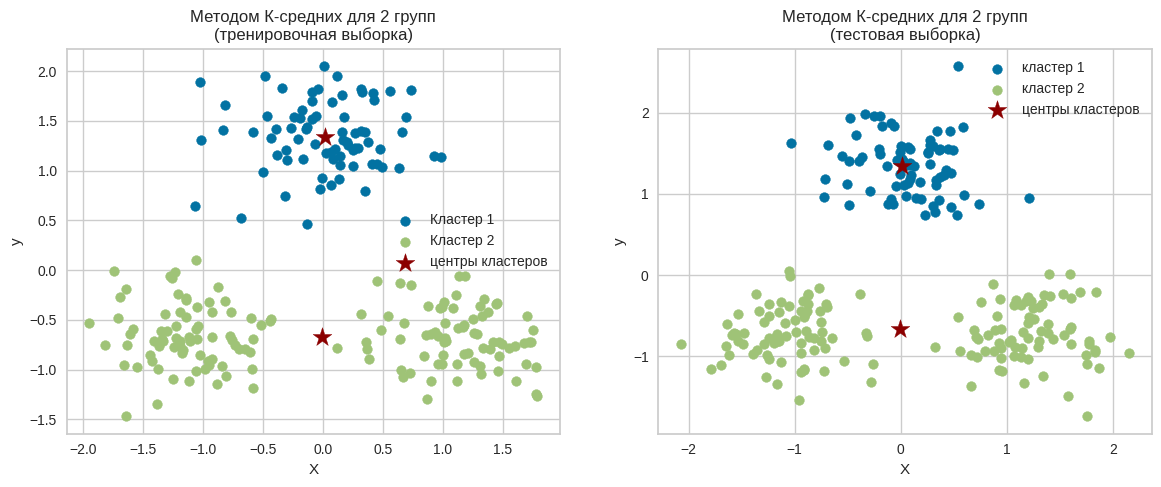

Коэффициент силуэта для 2 кластеров: 0.4876050683643876


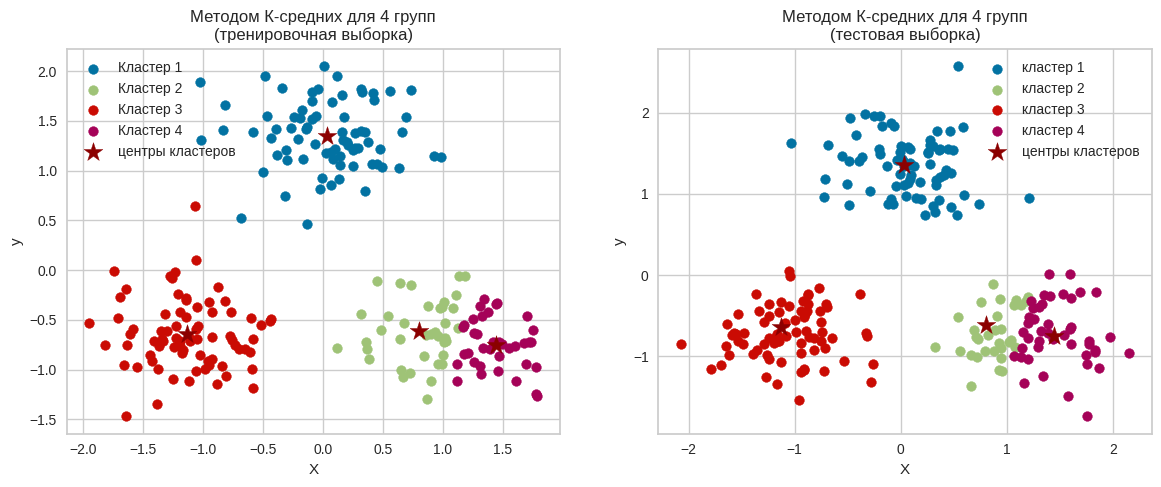

Коэффициент силуэта для 4 кластеров: 0.5684592236751559


In [ ]:
for n in [2, 4]:
  k_means = KMeans(n_clusters = n, random_state = 1)
  k_means2 = k_means.fit(train_scaled)
  clusters_predict2 = k_means.predict(train_scaled)

  plt.figure(figsize=(14,5))
  plt.subplot(1, 2, 1)

  for i in range(n):
    cluster_points = train_scaled[clusters_predict2 == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {i + 1}')

  cluster_centers_2 = k_means.cluster_centers_
  for i in range(n):
    plt.scatter(cluster_centers_2[i][0], cluster_centers_2[i][1],
                color="darkred", marker="*", s=200,
                label='центры кластеров' if i == 0 else "")

  s_score_2 = silhouette_score(train_scaled, clusters_predict2)

  plt.xlabel('X')
  plt.ylabel('y')
  plt.title(f'Методом К-средних для {n} групп\n(тренировочная выборка)')
  plt.legend()

  clusters_predict_2 = k_means.predict(test_scaled)

  plt.subplot(1, 2, 2)
  for i in range(n):
    cluster_points = test_scaled[clusters_predict_2 == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'кластер {i + 1}')

  cluster_centers_2 = k_means.cluster_centers_
  for i in range(n):
    plt.scatter(cluster_centers_2[i][0], cluster_centers_2[i][1], color="darkred", marker="*", s=200,
                label='центры кластеров' if i == 0 else "")

  plt.xlabel('X')
  plt.ylabel('y')
  plt.title(f'Методом К-средних для {n} групп\n(тестовая выборка)')
  plt.legend()
  plt.show()
  print(f'Коэффициент силуэта для {n} кластеров: {s_score_2}')

**Кластеризация при n=2:** коэффициент силуэта: 0.4877 умеренно низкий, что говорит о недостаточно четкой сегментации данных. Два больших кластера разделяют данные, но видны области, где точки одной группы (например, синие и оранжевые) расположены довольно близко. Данные плохо описываются только двумя кластерами — внутри одного кластера видны подгруппы. Вывод: Модель с двумя кластерами не оптимальна для этой задачи, так как кластеризация недостаточно точная.

**Кластеризация при n=4:** коэффициент силуэта: 0.5685 средний результат, хуже, чем при n=3. Кластеры выглядят раздробленными. Например, синий кластер был разделен на два более мелких (синий и зеленый). Видна некоторая избыточность: появление четвертого кластера не добавляет ценности для разделения данных. Вывод: Четыре кластера слишком подробно разбивают данные, ухудшая целостность группировки. Это избыточное решение.

Возваращаясь к **кластеризации при n=3**, коэффициент силуэта  0.7063 - это хороший результат, указывающий на качественную кластеризацию. Данные разделены на три четко выраженных кластера. Кластеры выглядят компактными и хорошо разделенными.Центры кластеров находятся логично относительно данных. Вывод: Три кластера — наиболее подходящее решение для сегментации. Коэффициент силуэта подтверждает высокое качество.

Далее строится график локтя

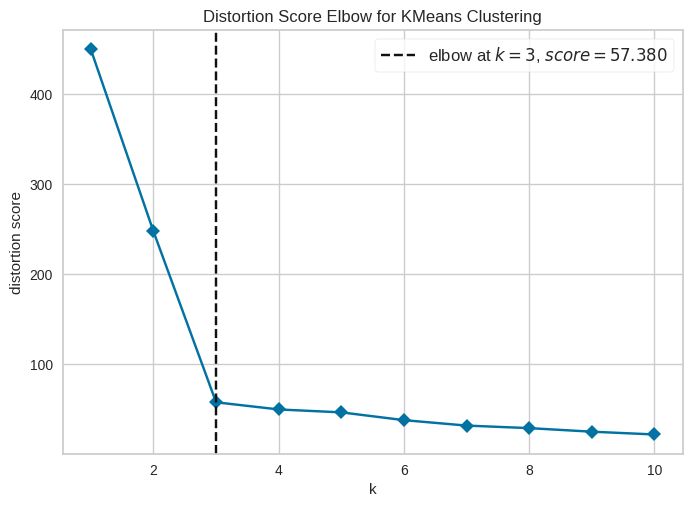

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow = KElbowVisualizer(k_means, k=(1,11), timings=False)
elbow.fit(train_scaled)
elbow.show()

В точке 3 увеличение числа кластеров перестает существенно уменьшать сумму квадратов расстояний, и этот момент считается оптимальным числом кластеров, следовательно, гипотеза о трех кластерах верна.

### Часть 2 - Кластеризация по варианту

Проводится загрузка и считывание csv файла с помощью библиотеки pandas.
Берется файл соответсвенно своему варианту, то есть 1heart.csv.

In [ ]:
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1heart.csv')
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0
5,39,M,NAP,120.0,339,0,Normal,170.0,N,0.0,Up,0
6,45,F,ATA,130.0,237,0,Normal,170.0,N,0.0,Up,0
7,54,M,ATA,110.0,208,0,Normal,142.0,N,0.0,Up,0
8,37,M,ASY,140.0,207,0,Normal,130.0,Y,1.5,Flat,1
9,48,F,ATA,120.0,284,0,Normal,120.0,N,0.0,Up,0


Содержит информацию о сердечных болезнях
1. возраст
2. пол
3. тип боли в груди (4 значения [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP:
неангинальная боль, ASY: бессимптомная])
4. артериальное давление в покое
5. холестерин сыворотки в мг/дл
6. уровень сахара в крови натощак > 120 мг/дл
7. ЭКГ в покое: результаты электрокардиограммы в покое (норма: нормальная, ST: аномалия ST-T LVN:
гипертрофия)
8. MaxHR: максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до
202]
9. стенокардия, вызванная физической нагрузкой (да, нет)
10. oldpeak = депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
11. наклон пикового сегмента ST при нагрузке (Вверх: восходящий, Плоский: плоский, Вниз: нисходящий)
12. HeartDisease: выходной класс [1: болезнь сердца, 0: нормальный]

Далее необходимо проверить данные и провести предобработку. Для начала идет проверка на наличие дубликатов.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     924 non-null    object 
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 86.8+ KB


Необходимо привести значения столбца `Cholesterol` к типу `int`. Также необходимо удалить дубликаты.

In [ ]:
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'], errors='coerce').fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     925 non-null    int64  
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.8+ KB


Идет проверка на наличие пропусков.

In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,2
Cholesterol,0
FastingBS,0
RestingECG,1
MaxHR,1
ExerciseAngina,0
Oldpeak,0


Чтобы модель правильно классифицировала наблюдения, вместо заполнения пустых полей они просто удаляются, так как их количество незначительно.

Сразу же производится проверка на явные и неявные дубликаты.

In [ ]:
df = df.dropna()

print(df.duplicated().sum())

print(df['Sex'].unique(),
      df['ChestPainType'].unique(),
      df['RestingECG'].unique(),
      df['ExerciseAngina'].unique(),
      df['ST_Slope'].unique())

3
['M' 'F' 'Ma'] ['ATA' 'NAP' 'ASY' 'TA'] ['Normal' 'ST' 'LVH'] ['N' 'Y'] ['Up' 'Flat' 'Down' 'UP']


Явные дубликаты удаляются, а неявные заменяются на корректные значения в столбцах 'Sex' и 'ST_Slope'.

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

df['Sex'] = df['Sex'].replace('Ma', 'M')
df['ST_Slope'] = df['ST_Slope'].replace('UP', 'Up')
print(df['Sex'].unique(),
      df['ST_Slope'].unique())

['M' 'F'] ['Up' 'Flat' 'Down']


Для кластерного анализа данных необходимо привести строковые данные к числовым. Для этого используется `OrdinalEncoder`.

In [ ]:
enc = OrdinalEncoder()
df['Sex'] = enc.fit_transform(df[['Sex']])
df['ChestPainType'] = enc.fit_transform(df[['ChestPainType']])
df['RestingECG'] = enc.fit_transform(df[['RestingECG']])
df['ExerciseAngina'] = enc.fit_transform(df[['ExerciseAngina']])
df['ST_Slope'] = enc.fit_transform(df[['ST_Slope']])
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140.0,289,0,1.0,172.0,0.0,0.0,2.0,0
1,49,0.0,2.0,160.0,180,0,1.0,156.0,0.0,1.0,1.0,1
2,37,1.0,1.0,130.0,283,0,2.0,98.0,0.0,0.0,2.0,0
3,48,0.0,0.0,138.0,214,0,1.0,108.0,1.0,1.5,1.0,1
4,54,1.0,2.0,150.0,195,0,1.0,122.0,0.0,0.0,2.0,0
5,39,1.0,2.0,120.0,339,0,1.0,170.0,0.0,0.0,2.0,0
6,45,0.0,1.0,130.0,237,0,1.0,170.0,0.0,0.0,2.0,0
7,54,1.0,1.0,110.0,208,0,1.0,142.0,0.0,0.0,2.0,0
8,37,1.0,0.0,140.0,207,0,1.0,130.0,1.0,1.5,1.0,1
9,48,0.0,1.0,120.0,284,0,1.0,120.0,0.0,0.0,2.0,0


По итогу в столбцах 'Sex' и 'ExerciseAngina' вместо значений 'M' или 'F' и 'Y' или 'N' указаны 0 и 1, а в оставшихся категориальных столбцах значения могут достигать от 0 до 3.

Далее необходимо выбрать целевую переменную, предсказания которой в дальнейшем будут выполняться, также эта переменная не будет включаться в модель.

В качестве целевой переменной был выбран столбец `HeartDisease` и строится матрица диаграмм рассеивания, где значения целевой переменной будут подчеркнуты разными цветами.

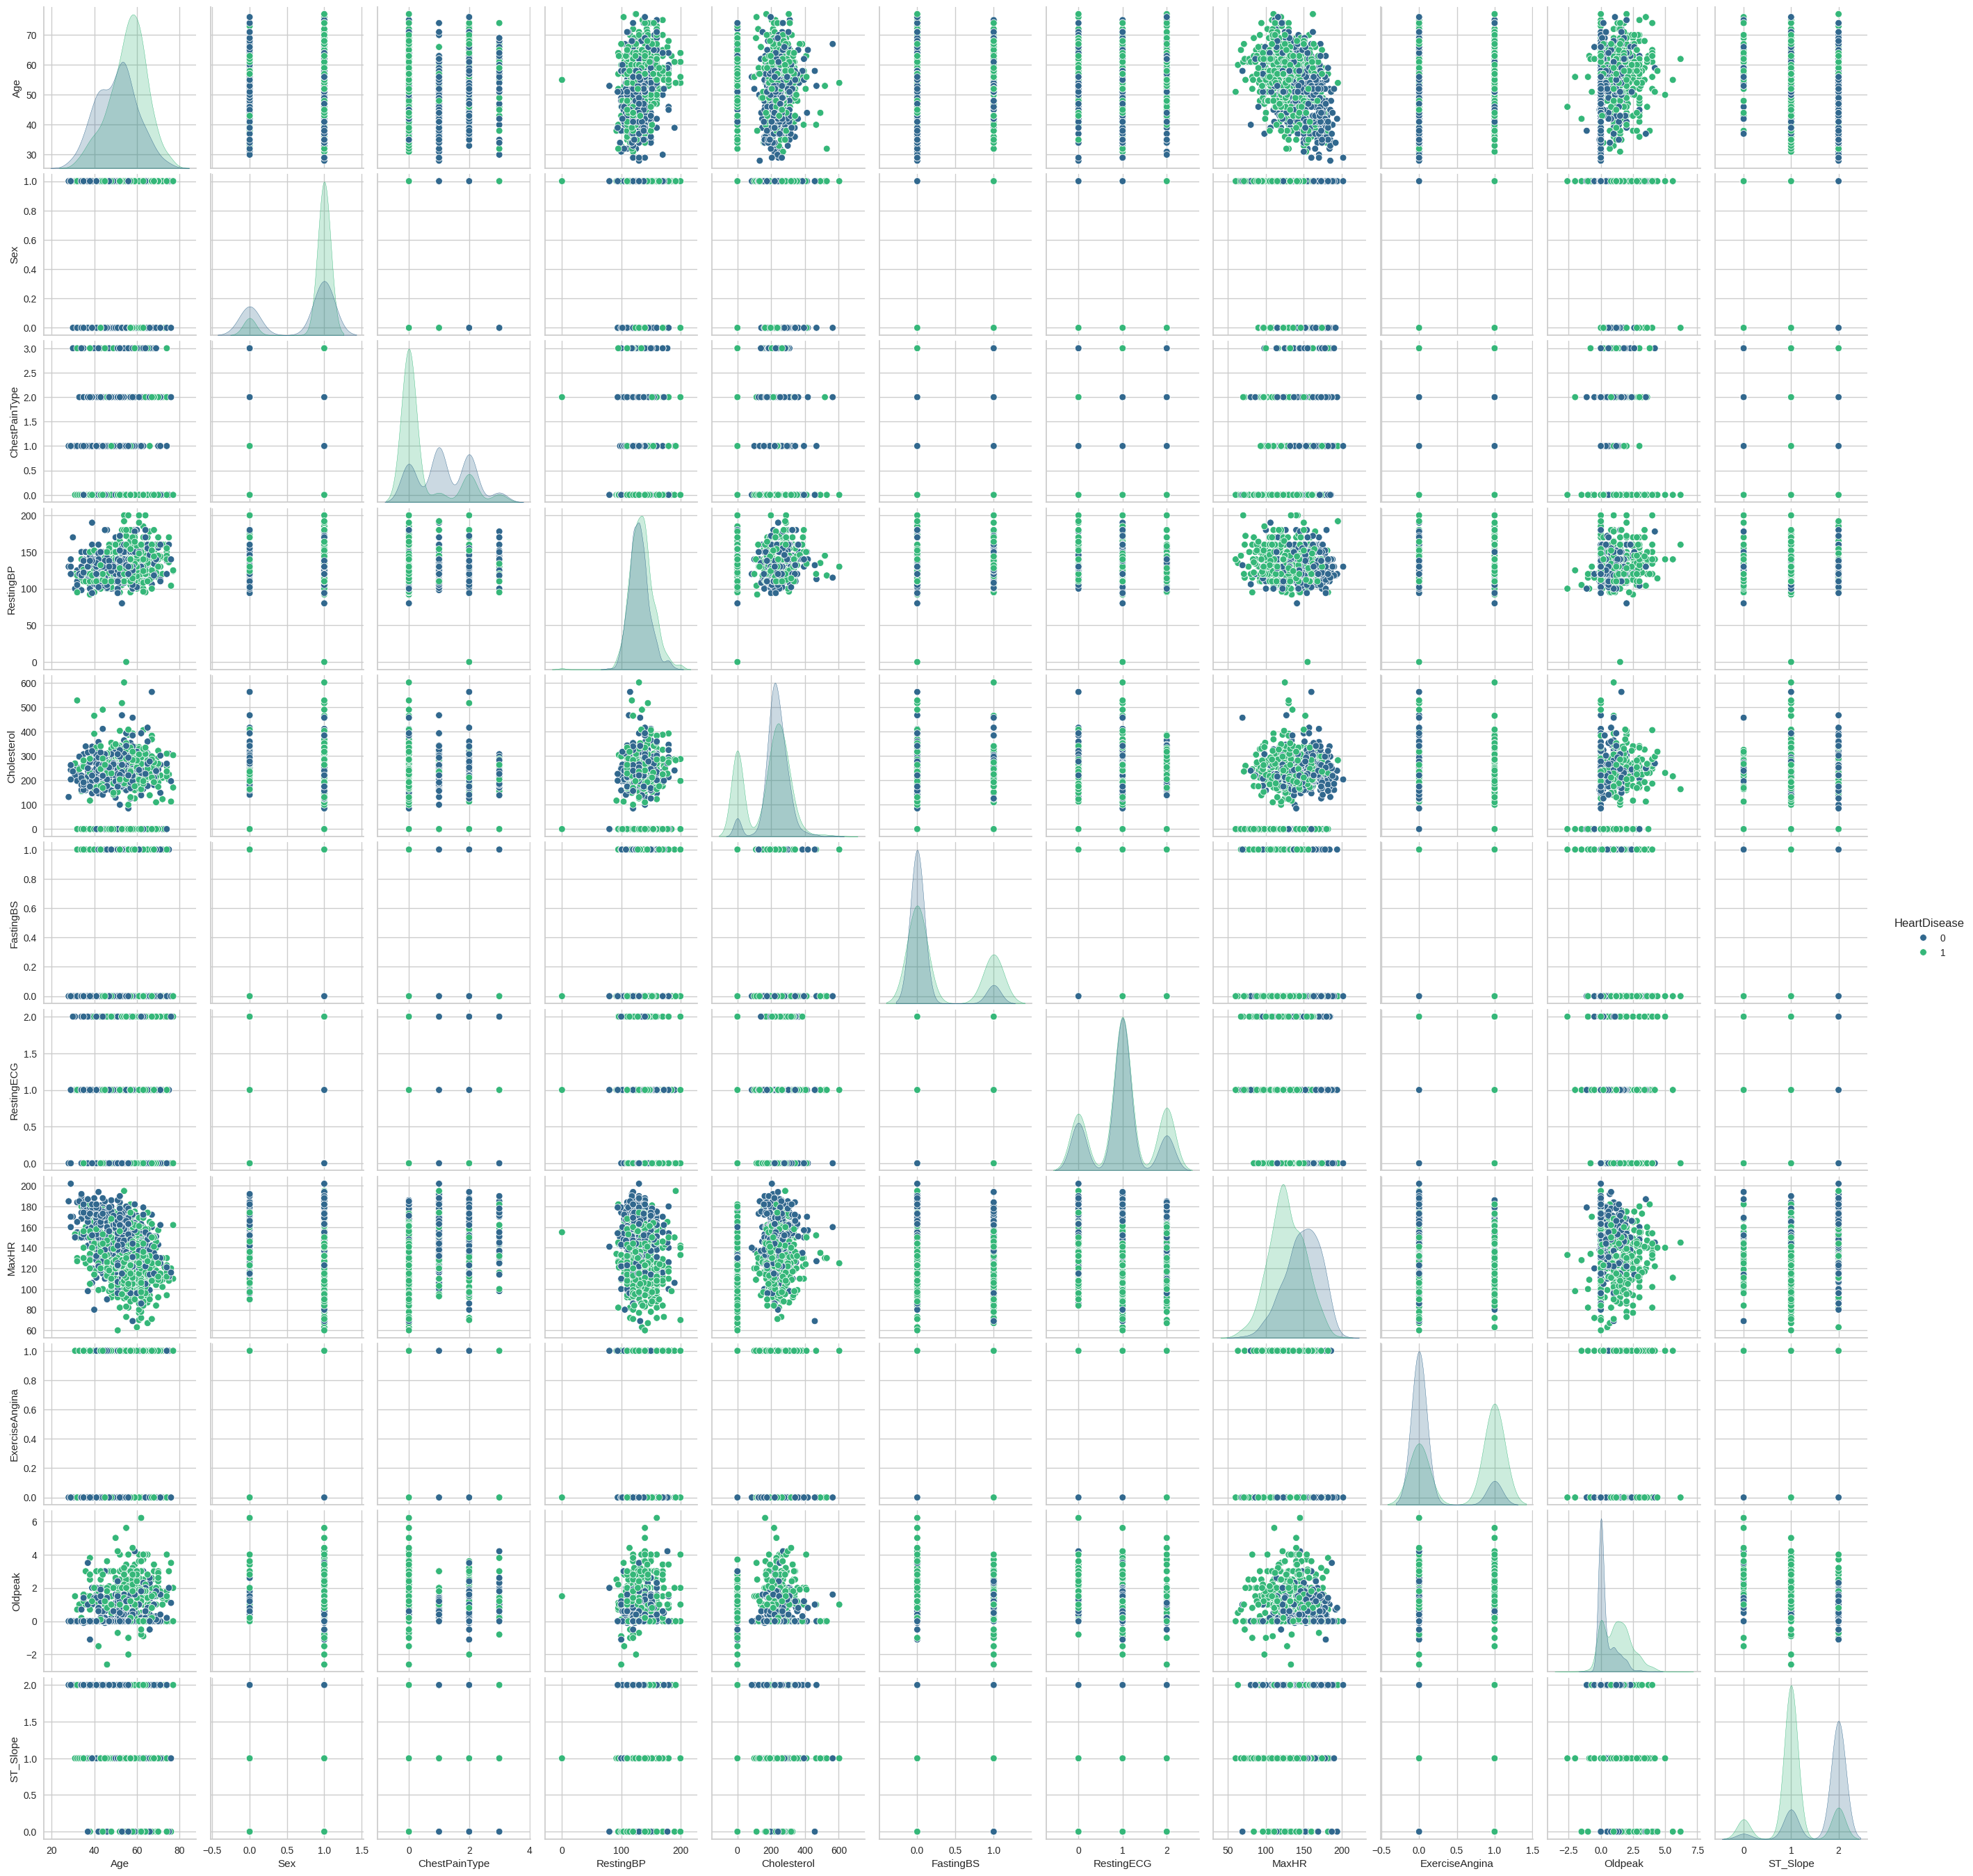

In [ ]:
sns.pairplot(df, hue='HeartDisease', palette='viridis')
plt.show()

Эта матрица диаграмм рассеивания показывает взаимосвязи между различными признаками набора данных, разделяя данные по наличию или отсутствию сердечно-сосудистых заболеваний. На диагонали представлены распределения признаков, из которых, например, видно, что такие переменные, как возраст (Age) и уровень холестерина (Cholesterol), имеют асимметричные распределения. Взаимодействия между признаками, такими как MaxHR (максимальная частота сердечных сокращений) и Age, показывают, что пациенты с HeartDisease = 1 имеют тенденцию к более низким значениям MaxHR. Переменные, такие как Cholesterol и RestingBP (артериальное давление в покое), не демонстрируют четкого разделения между группами, что указывает на их меньшую предсказательную силу. В то же время, такие признаки, как ST_Slope (наклон сегмента ST) и Oldpeak (депрессия ST), имеют более явное разделение между группами, что делает их потенциально значимыми для диагностики. Общая визуализация позволяет предположить, что определенные признаки имеют большую корреляцию с HeartDisease, что может быть полезно для дальнейшего анализа и построения моделей классификации.

Данные делятся на тренировочные и тестовые выборки.

In [ ]:
target = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=1)

print("X_train:")
display(X_train.head(3))
print("X_test:")
display(X_test.head(3))

X_train:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
41,52,1.0,2.0,140.0,259,0,2.0,170.0,0.0,0.0,2.0,0
891,57,1.0,1.0,154.0,232,0,0.0,164.0,0.0,0.0,2.0,1
265,34,1.0,1.0,98.0,220,0,1.0,150.0,0.0,0.0,2.0,0


X_test:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
900,58,1.0,1.0,125.0,220,0,1.0,144.0,0.0,0.4,1.0,0
570,64,1.0,0.0,150.0,193,0,2.0,135.0,1.0,0.5,1.0,1
791,67,1.0,0.0,125.0,254,1,1.0,163.0,0.0,0.2,1.0,1


Далее необходимо стандартизировать данные с помощью `StandardScaler`.

In [ ]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

Определяется оптимальное количество кластеров с помощью метода локтя

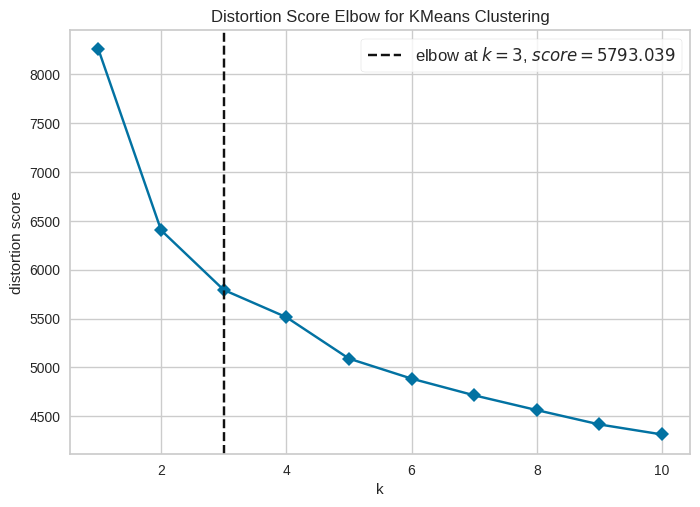

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow = KElbowVisualizer(k_means, k=(1,11), timings=False)
elbow.fit(X_train_sc)
elbow.show()

По графику видно, что локоть находится на 3-4 уровне, при k = 3 или k = 4 можно получить хорошие кластеры, не усложняя модель. Далее модель обучается с числом кластеров 3.

Далее данные группируются по меткам кластеров, и для каждого кластера вычисляются средние значения числовых признаков.

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                       n_init=10, max_iter = 1000, random_state = 1)
target_pred = kmeans.fit_predict(X_train_sc)

Далее, для объективной оценки работы модели подсчитываются средние показатели по каждому признаку каждого кластера. Для этого сначала создается новый датафрейм на основе тренировочных данных, затем к нему присоединяется целевая переменная.

In [ ]:
summ = X_train
summ['target'] = target_pred
summ.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,target
41,52,1.0,2.0,140.0,259,0,2.0,170.0,0.0,0.0,2.0,0,0
891,57,1.0,1.0,154.0,232,0,0.0,164.0,0.0,0.0,2.0,1,0
265,34,1.0,1.0,98.0,220,0,1.0,150.0,0.0,0.0,2.0,0,0
177,46,0.0,0.0,130.0,238,0,1.0,90.0,0.0,0.0,2.0,0,0
241,43,0.0,1.0,120.0,266,0,1.0,118.0,0.0,0.0,2.0,0,0


Далее производится группировка по целевому признаку и подсчет средних значений каждого признака.

In [ ]:
mean_summ = summ.groupby('target').mean().round(2)
mean_summ.T

target,0,1,2
Age,50.32,57.57,56.15
Sex,0.64,0.95,0.87
ChestPainType,1.27,0.58,0.32
RestingBP,129.37,132.84,137.22
Cholesterol,231.19,41.07,250.89
FastingBS,0.10,0.63,0.16
RestingECG,0.91,1.24,0.95
MaxHR,151.30,118.82,127.48
ExerciseAngina,0.07,0.50,0.83
Oldpeak,0.28,0.87,1.87


* Класс 0 ассоциируется с более высоким уровнем физической нагрузки (MaxHR) и меньшими сердечными рисками (низкая стенокардия, высокий ST_Slope).
* Класс 1 имеет наибольшую связь с нарушениями глюкозного обмена.
* Класс 2 указывает на повышенные риски сердечных заболеваний (высокий холестерин, стенокардия, низкий ST_Slope).

Подсчитывается коэффициент силуэта.

In [ ]:
silhouette_score(X_train_sc, target_pred).round(3)

0.193

Коэффициент силуэта варьируется в диапазоне от -1 до 1. Близко к 1: объекты хорошо сгруппированы внутри своих кластеров и отделены от других кластеров.
Около 0: кластеры перекрываются или плохо разделены. Отрицательное значение: объекты, скорее всего, находятся в неправильных кластерах. Значение 0.193 - это низкий коэффициент силуэта, что указывает на слабую структуру кластеров.

Далее необходимо подсчитать другие метрики.

In [ ]:
ari = adjusted_rand_score(y_train, target_pred)
ami = adjusted_mutual_info_score(y_train, target_pred)
homogeneity = homogeneity_score(y_train, target_pred)
completeness = completeness_score(y_train, target_pred)

# Вывод метрик
print(f'ARI: {ari}')
print(f'AMI: {ami}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')

ARI: 0.45111094853265743
AMI: 0.4388356020762795
Homogeneity: 0.5616227968053122
Completeness: 0.36137120374291043


* *ARI (Adjusted Rand Index): 0.451.* Значение 0.451 говорит о умеренном соответствии между предсказанными кластерами и истинными метками.
Это означает, что модель смогла уловить часть структуры данных, но есть значительное пространство для улучшений.
* *AMI (Adjusted Mutual Information): 0.438.* Значение 0.438 указывает на умеренное сходство между предсказанными кластерами и истинными метками.
Это согласуется с *ARI* и говорит о том, что модель находит определенные закономерности, но структура кластеров не полностью соответствует истинной.
* *Homogeneity: 0.562.* Значение 0.562 говорит о том, что кластеры в основном гомогенны, но есть заметное количество объектов, которые попадают в "неправильные" кластеры.
* *Completeness: 0.361.* Низкое значение 0.361 указывает, что модель плохо объединяет объекты одного истинного класса в один кластер.

Качество кластеризации умеренное: *ARI* и *AMI* (~0.45) показывают, что модель частично находит закономерности в данных, но есть ошибки в группировке.
Гомогенность лучше, чем полнота: Кластеры относительно чистые (гомогенны), но модель не способна полностью выделить истинные классы (низкая полнота). Это указывает, что модель схватывает часть структуры данных, но не полностью.

Создается модель иерархической кластеризации, для начала `AgglomerativeClustering` реализует саму кластеризацию, принимаются такие параметры как:
- `n_clusters=None` означает, что объединение продолжается до тех пор, пока не останется один кластер
- `distance_threshold=0`означает, что модель будет продолжать объединение кластеров без остановки, чтобы построить полное дерево.
- `linkage='ward'` задает метод соединения кластеров: метод Уорда минимизирует сумму квадратов отклонений точек от их центроида.

Далее метод `dendrogram` строит дендрограмму.
- matrix_link содержит сами данные для построения.
- p=4 и truncate_mode='level' ограничивают уровень, который выведется на экран пользователя, в данном случае 4.

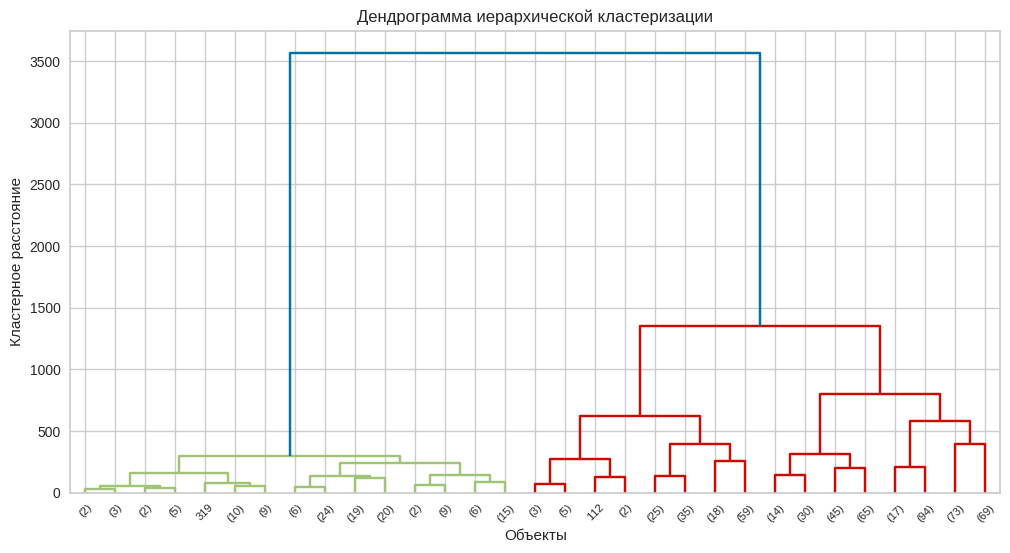

In [ ]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
cluster_labels = clustering.fit_predict(X_train)
matrix_link = linkage(X_train, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(matrix_link, p=4, truncate_mode='level')
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Объекты')
plt.ylabel('Кластерное расстояние')
plt.show()

Данная дендрограмма показывает, что данные можно разделить на три основных кластера при разрезе на уровне кластерного расстояния около 1500-2000: зеленый, красный и синий. Синий кластер выделяется наиболее сильно, так как объединяется на самом высоком уровне (около 3500), что указывает на значительные различия между ним и остальными кластерами. Зеленый и красный кластеры имеют более короткие ветви, что свидетельствует о большей схожести объектов внутри них, причем зеленый кластер выглядит наиболее однородным. Красный кластер более сложен и содержит несколько подкластеров.

Далее выполняется кластеризация иерархическим агломеративным методом и подсчитываются средние показатели по каждому признаку каждого кластера и вычисляются несколько метрик качества.

In [ ]:
agg_model = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_pred = agg_model.fit_predict(X_train_sc)

s_score = silhouette_score(X_train, agg_pred)
ARI_agg = adjusted_rand_score(y_train, agg_pred)
homogeneity_agg = homogeneity_score(y_train, agg_pred)

print(f'Коэфф. силуэта: {round(s_score, 3)} \nARI: {round(ARI_agg, 3)}\nОднородность: {round(homogeneity, 3)}')

summ['target'] = agg_pred
mean_summary = summ.groupby('target').mean().round(2)
mean_summary.T

Коэфф. силуэта: -0.007 
ARI: 0.685
Однородность: 0.562


target,0,1
Age,55.84,50.32
Sex,0.89,0.59
ChestPainType,0.53,1.29
RestingBP,134.36,129.91
Cholesterol,180.46,224.24
FastingBS,0.32,0.10
RestingECG,1.01,0.97
MaxHR,128.94,149.16
ExerciseAngina,0.64,0.02
Oldpeak,1.35,0.22


Коэффициенты кластеризации:

Коэффициент силуэта (-0.007): Указывает на отсутствие четкой кластерной структуры. Объекты слабо сгруппированы, кластеры перекрываются, либо данные плохо разделимы. ARI (0.685): Указывает на умеренное соответствие предсказанных кластеров истинным меткам. Однородность (0.562): Подтверждает, что кластеры в целом однородны, но ошибки разделения присутствуют.

Выводы по сравнительной таблице:

Возраст (Age): у пациентов с target=0 (здоровые) средний возраст выше (55.84) по сравнению с target=1 (50.32), что может указывать на более высокий риск заболевания у более молодых. Пол (Sex): у здоровых пациентов (target=0) соотношение мужчин выше (0.89), чем у пациентов с заболеванием (target=1, 0.59).
Тип боли в груди (ChestPainType): У пациентов с заболеванием (target=1) боль в груди выражена сильнее (1.29 против 0.53). Давление (RestingBP): пациенты с target=1 имеют немного ниже среднее давление (129.91 против 134.36). Холестерин (Cholesterol): пациенты с заболеванием имеют более высокий уровень холестерина (224.24 против 180.46), что является значимым фактором риска. FastingBS (уровень сахара натощак): значение выше у пациентов с target=1 (0.71 против 0.32), что также связано с риском сердечно-сосудистых заболеваний. Частота сердечных сокращений (MaxHR): у пациентов с заболеванием (target=1) пульс выше (149.16 против 128.94). ExerciseAngina (стенокардия при нагрузке): пациенты с target=1 чаще испытывают стенокардию (0.64 против 0.02). Oldpeak: у пациентов с заболеванием показатель выше (2.02 против 1.35), что говорит о большей ишемии.
ST_Slope: у пациентов с target=1 наблюдается более выраженный наклон сегмента ST (1.89 против 1.05).

## Вывод

В ходе выполнения лабораторной работы были изучены методы и алгоритмы кластеризации данных на практике, с целью выявления закономерностей. Работа была разделена на две части.

В первой части работы выполнялась кластеризация над сгенерированным набором данных. Был сделан выбор работы с тремя кластерами, подсчитанный коэффициент силуэта получился равен 0.706, что указывает на хорошее качество кластеризации и говорит о том, что объекты в пределах кластеров хорошо сгруппированы. В дальнейшем гипотеза с тремя кластерами была успешна проверене с помощью метода локтя.

Во второй же части работа велась над датасетом, содержащим данные о пациентах и об их статусе сердечных заболеваний. Файл с нужным датасетом был загружен и считан с помощью библиотеки pandas. Затем была произвденена предобработка данных, были удалены пропуски, проверены и исправлены явные и неявные дубликаты и так далее. Все качественные параметры были переведены в количественные, так как кластеризация не работает с качественными параметрами. Признаки были разделены на обучающую и тестовую выборки, после чего стандартизированы.

Далее было определено кол-во кластеров методом К-средних, обучение модели и предсказание. В среднем метрики качества модели показали довольно низкие значения, что могло объясняться некорректностью данных, либо тем, что признаки плохо описывают целевой признак.

Также в этой части работы проводилась кластеризация иерархическим агломеративным методом и была построена дендограмма.

По результатам работы, лучшие показатели продемонстрировала модель кластеризации иерархическим агломеративным методом для 2 кластеров, нежели чем модель обученная методом К-средних для 3 кластеров. Иерархический метод показывает лучшее разделение кластеров (высокий коэффициент силуэта), но это не согласуется с истинными метками (низкие ARI и однородность). K-Means дает более согласованное соответствие с истинными метками (лучшие ARI, AMI и однородность), хотя разделение кластеров хуже (низкий коэффициент силуэта).


## Дополнительное задание

### Задание 4

Использовать `SilhouetteVisualizer` для разного количества кластеров и сравнить результаты. Также использовать `KElbowVisualizer` и метрику `silhouette`. Сделать выводы.

Для начала будет определено оптимальное количество кластеров с использованием KElbowVisualizer, где в качестве метрики применяется силуэт. Этот метод позволяет визуализировать изменение значений метрики при разном количестве кластеров и определить наиболее подходящее значение k.

Далее для каждого количества кластеров в диапазоне от 2 до 9 будет выполнена кластеризация методом KMeans с последующим расчётом коэффициента силуэта. Эта метрика оценивает качество кластеризации, показывая степень схожести объектов внутри одного кластера и их отделимость от других кластеров. Для наглядной интерпретации результатов будет использован SilhouetteVisualizer, который строит график распределения силуэтных коэффициентов для каждого кластера.

В завершении будут представлены значения коэффициента силуэта для всех рассмотренных значений k, что позволит сделать вывод о наилучшем числе кластеров.

Определение оптимального числа кластеров с использованием KElbowVisualizer...


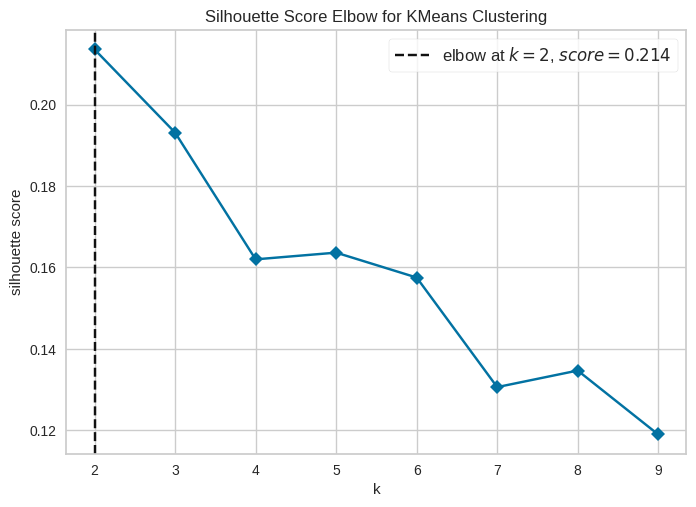


Коэффициент силуэта и визуализация для различных значений кластеров:

Количество кластеров: 2
Коэффициент силуэта: 0.2135


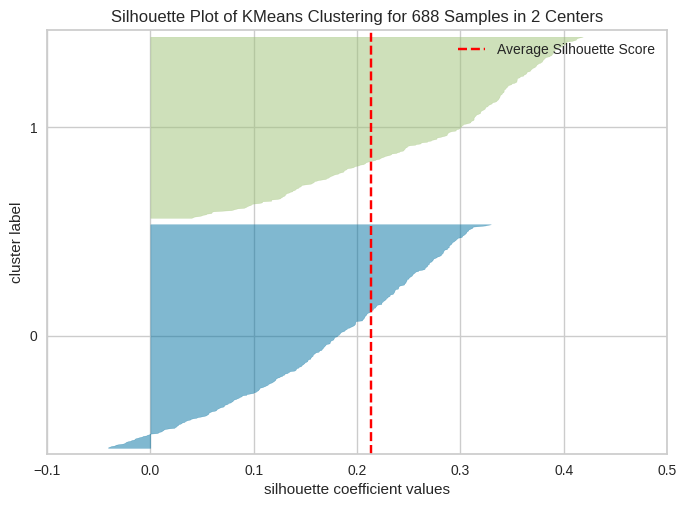


Количество кластеров: 3
Коэффициент силуэта: 0.1931


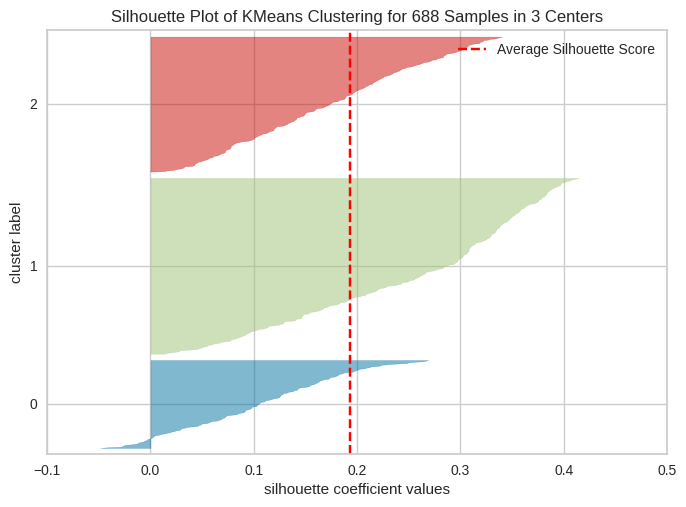


Количество кластеров: 4
Коэффициент силуэта: 0.1620


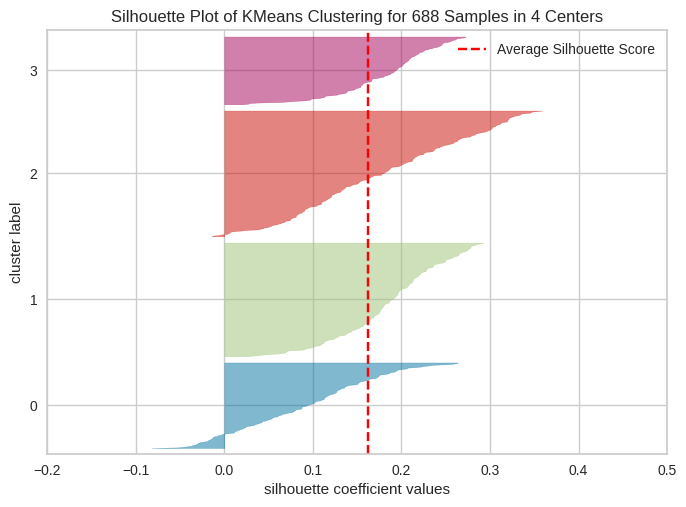


Количество кластеров: 5
Коэффициент силуэта: 0.1636


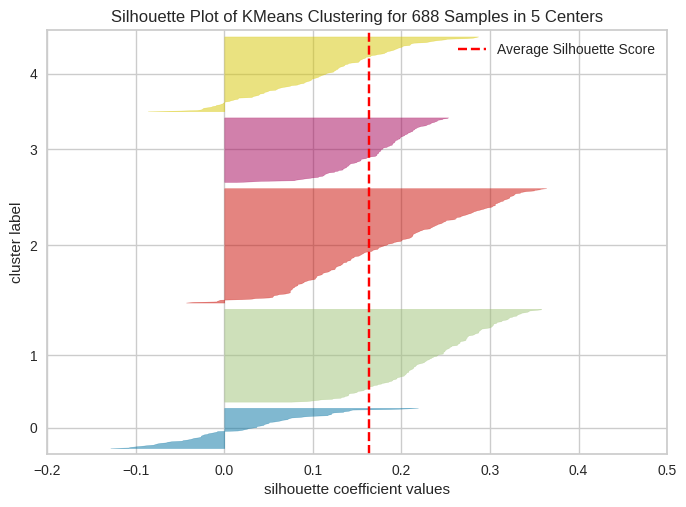


Количество кластеров: 6
Коэффициент силуэта: 0.1575


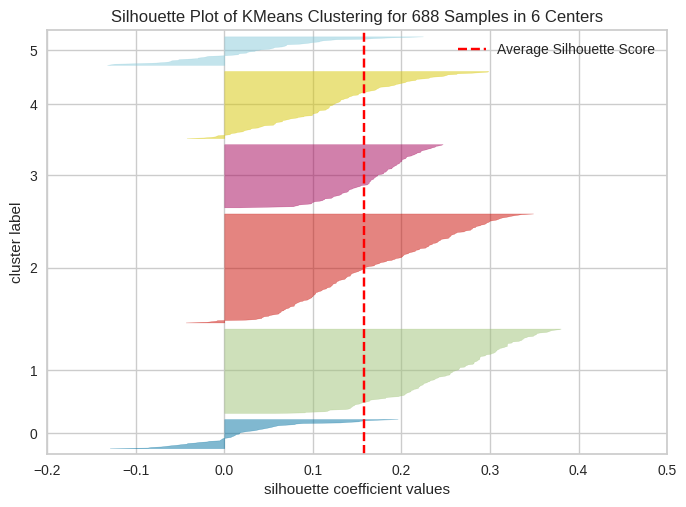


Количество кластеров: 7
Коэффициент силуэта: 0.1306


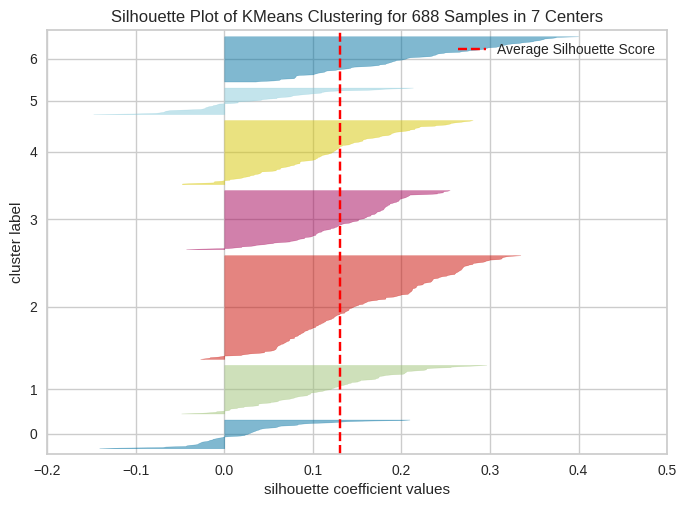


Количество кластеров: 8
Коэффициент силуэта: 0.1347


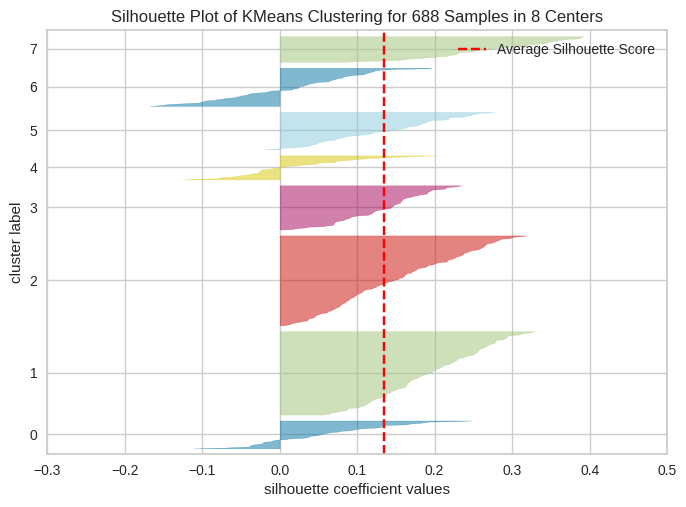


Количество кластеров: 9
Коэффициент силуэта: 0.1190


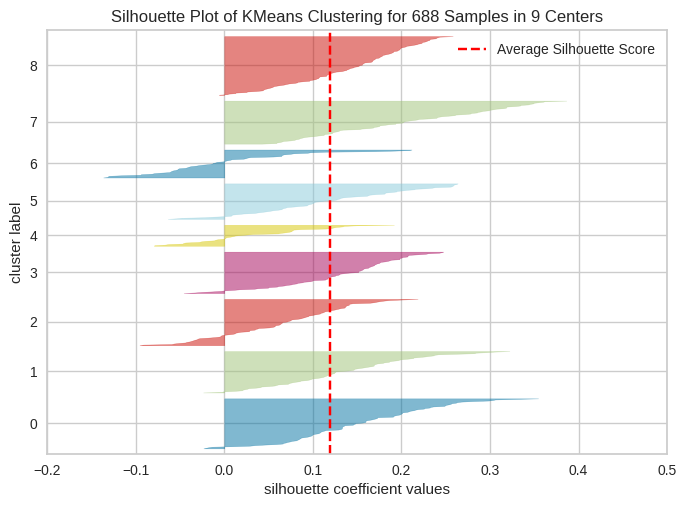


Результаты коэффицентов силуэта для всех кластеров:
   Количество кластеров  Коэффициент силуэта
0                     2             0.213524
1                     3             0.193107
2                     4             0.161987
3                     5             0.163636
4                     6             0.157519
5                     7             0.130615
6                     8             0.134683
7                     9             0.118984


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

print("Определение оптимального числа кластеров с использованием KElbowVisualizer...")
elbow_visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='silhouette', timings=False)
elbow_visualizer.fit(X_train_sc)
elbow_visualizer.show()

print("\nКоэффициент силуэта и визуализация для различных значений кластеров:")
silhouette_scores = []

for n_clusters in range(2, 10):
    print(f"\nКоличество кластеров: {n_clusters}")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_sc)

    silhouette_avg = silhouette_score(X_train_sc, cluster_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))
    print(f"Коэффициент силуэта: {silhouette_avg:.4f}")

    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X_train_sc)
    visualizer.show()

print("\nРезультаты коэффицентов силуэта для всех кластеров:")
silhouette_df = pd.DataFrame(silhouette_scores, columns=["Количество кластеров", "Коэффициент силуэта"])
print(silhouette_df)

На основе проведённого анализа с использованием KElbowVisualizer и метрики силуэта можно сделать следующие выводы.

Оптимальное количество кластеров для данного набора данных — 2. Это подтверждается как методом локтя, так и максимальным значением коэффициента силуэта, который равен 0.2135. При двух кластерах наблюдается наилучшее разделение данных, а качество кластеризации является относительно стабильным.

С увеличением числа кластеров метрика силуэта начинает снижаться, что указывает на ухудшение качества разделения. Уже при k=3 наблюдается заметное падение коэффициента силуэта, а при k≥4 метрика остаётся низкой. Это говорит о том, что добавление дополнительных кластеров не приносит значительного улучшения, а скорее приводит к размытию границ между группами.

Визуализация распределения силуэтных коэффициентов также показывает, что при двух кластерах данные разделены лучше всего. Для большего числа кластеров появляется больше элементов с низкими и отрицательными значениями силуэта, что свидетельствует о слабой структурированности кластеров. Таким образом, k=2 является наиболее подходящим решением для данной задачи кластеризации.

### Задание 10

 Выполнить кластеризацию с помощью метода `DBSCAN`. Добавить описание метода (теор.часть). Сравнить результаты с полученными ранее.


DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, который объединяет точки на основе плотности их расположения. Основное преимущество DBSCAN заключается в том, что он не требует заранее задавать количество кластеров и способен выявлять кластеры произвольной формы. В алгоритме используются два ключевых параметра: eps, определяющий максимальное расстояние между точками для их объединения в одну группу, и min_samples, обозначающий минимальное количество точек для формирования плотного региона. Точки, которые не попадают ни в один кластер, считаются шумом и помечаются отдельной меткой.

В данном коде осуществляется кластеризация данных с использованием алгоритма DBSCAN из библиотеки scikit-learn. Сначала задаются параметры eps (максимальное расстояние между точками, чтобы считать их соседями) и min_samples (минимальное количество точек в области для формирования кластера). Затем создается объект DBSCAN с заданными параметрами, и модель обучается на масштабированных признаках X_train_sc.

Для оценки качества кластеризации рассчитываются метрики: Adjusted Rand Index (ARI), Adjusted Mutual Information (AMI) и Коэффициент силуэта. Коэффициент силуэта вычисляется только если было найдено больше одного кластера. В завершение результаты кластеризации и метрики выводятся на экран.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score

print("Проверка параметров DBSCAN с разными значениями eps:")
for eps in [0.3, 0.5, 0.7, 1.0]:
    print(f"\nТекущее значение eps: {eps}")

    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_train_sc)

    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)
    print(f"Количество кластеров: {n_clusters}")
    print(f"Количество шумовых точек: {n_noise}")

    if n_clusters > 0:
        if n_clusters > 1:
            silhouette_dbscan = silhouette_score(X_train_sc, dbscan_labels)
            print(f"Коэффициент силуэта: {silhouette_dbscan:.4f}")
        else:
            print("Коэффициент силуэта не может быть рассчитан (количество кластеров <= 1).")

        # Метрики ARI и AMI
        ari_dbscan = adjusted_rand_score(y_train, dbscan_labels)
        ami_dbscan = adjusted_mutual_info_score(y_train, dbscan_labels)
        print(f"Adjusted Rand Index (ARI): {ari_dbscan:.4f}")
        print(f"Adjusted Mutual Information (AMI): {ami_dbscan:.4f}")
    else:
        print("Не удалось сформировать кластеры. Все точки считаются шумовыми.")


Проверка параметров DBSCAN с разными значениями eps:

Текущее значение eps: 0.3
Количество кластеров: 0
Количество шумовых точек: 688
Не удалось сформировать кластеры. Все точки считаются шумовыми.

Текущее значение eps: 0.5
Количество кластеров: 0
Количество шумовых точек: 688
Не удалось сформировать кластеры. Все точки считаются шумовыми.

Текущее значение eps: 0.7
Количество кластеров: 1
Количество шумовых точек: 683
Коэффициент силуэта не может быть рассчитан (количество кластеров <= 1).
Adjusted Rand Index (ARI): 0.0050
Adjusted Mutual Information (AMI): 0.0148

Текущее значение eps: 1.0
Количество кластеров: 3
Количество шумовых точек: 631
Коэффициент силуэта: -0.2430
Adjusted Rand Index (ARI): 0.0323
Adjusted Mutual Information (AMI): 0.1175


Сначала значение параметра eps для метода DBSCAN было выбрано равным 0.5, однако результат показал отсутствие сформированных кластеров — все точки были помечены как шумовые. Это свидетельствует о том, что при данном значении параметра плотности eps DBSCAN не смог обнаружить структуры в данных. Для более глубокого анализа было принято решение протестировать несколько других значений eps: 0.3, 0.7 и 1.0.

При значении eps = 0.3 результат аналогичен: количество кластеров равно нулю, а все точки данных классифицированы как шум. Это говорит о том, что параметр плотности слишком мал, и даже соседние точки не попадают в зону влияния друг друга. Таким образом, DBSCAN считает все данные недостаточно плотными для формирования кластеров.

Для eps = 0.7 наблюдается незначительное улучшение — был сформирован один кластер, а остальные точки по-прежнему классифицируются как шумовые. Несмотря на это, коэффициент силуэта не может быть рассчитан, так как кластер всего один. Тем не менее, метрики ARI и AMI показывают очень низкие значения (близкие к нулю), что свидетельствует о слабом соответствии кластеризации истинной разметке данных. Этот результат указывает на то, что даже при увеличении eps до 0.7 метод не находит чётко выраженные группы в данных.

При дальнейшем увеличении параметра eps до 1.0 наблюдается формирование трёх кластеров. Количество шумовых точек уменьшается до 631, что говорит о повышении эффективности кластеризации. Однако коэффициент силуэта остаётся отрицательным, что указывает на слабую компактность и чёткость границ кластеров. Значения ARI и AMI также остаются невысокими, что говорит о слабой связи полученных кластеров с истинными классами данных.

Таким образом, можно сделать вывод, что метод DBSCAN на данном наборе данных имеет сложности с выявлением структур. При малых значениях eps алгоритм рассматривает все точки как шум, а при увеличении параметра появляются кластеры, однако их качество остаётся низким. Это может быть связано с характеристиками данных, например, их неоднородностью или отсутствием плотных локальных групп. Для улучшения результата можно дополнительно подбирать параметры eps и min_samples или попробовать другие методы кластеризации, более подходящие для данных данной природы.